<a href="https://colab.research.google.com/github/RewGuardiano/AI_Module_Assignment/blob/main/Soduku_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
from copy import deepcopy

In [9]:
def generate_indiviual():
  sudoku = np.zeros((9,9), dtype=int)  # Initialize empty grid
  for i in range(9):
    numbers = list(range(1,10))
    random.shuffle(numbers)
    sudoku[i]= numbers
  return sudoku

In [10]:
sudoku_grid = generate_indiviual()
print(sudoku_grid)

[[5 1 4 9 6 7 3 8 2]
 [3 9 2 8 7 5 1 4 6]
 [4 7 8 2 3 9 1 6 5]
 [6 9 5 8 3 2 1 4 7]
 [3 1 2 9 5 4 8 7 6]
 [1 7 2 3 8 6 4 5 9]
 [5 4 1 3 2 9 6 7 8]
 [3 6 2 7 5 9 4 1 8]
 [6 2 9 4 5 7 1 8 3]]


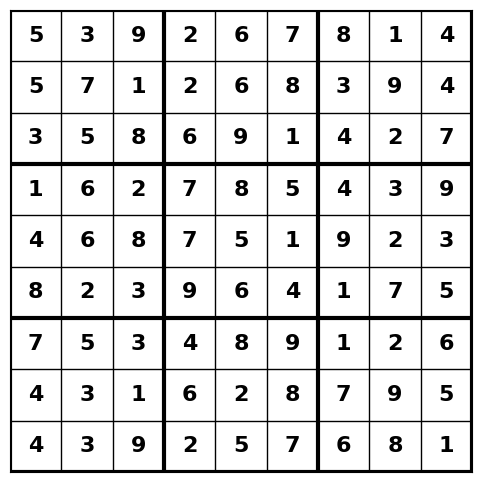

In [11]:
# Visualize the Sudoku grid with proper alignment
def visualize_sudoku(sudoku):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Ensure equal aspect ratio so that cells are square
    ax.set_aspect("equal")

    # Draw minor grid lines (thin cell borders)
    for i in range(10):
        lw = 1 if i % 3 != 0 else 3  # Thicker lines for 3x3 sub-grid
        ax.plot([i, i], [0, 9], color="black", linewidth=lw)  # Vertical lines
        ax.plot([0, 9], [i, i], color="black", linewidth=lw)  # Horizontal lines

    # Hide axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Fill in the numbers
    for i in range(9):
        for j in range(9):
            num = sudoku[i, j]
            if num != 0:
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center',
                        fontsize=16, fontweight='bold')

    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.show()

# Example usage
sudoku_grid = generate_indiviual()  # Generate Sudoku
visualize_sudoku(sudoku_grid)  # Display Sudoku


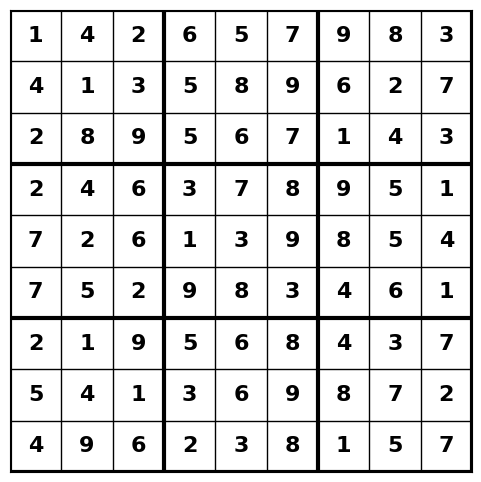

Total cost: 60
Column duplicate indices: [(3, 0), (5, 0), (6, 0), (8, 0), (3, 1), (6, 1), (7, 1), (4, 2), (5, 2), (6, 2), (8, 2), (2, 3), (6, 3), (7, 3), (5, 4), (6, 4), (7, 4), (8, 4), (2, 5), (4, 5), (6, 5), (7, 5), (8, 5), (3, 6), (6, 6), (7, 6), (8, 6), (4, 7), (8, 7), (2, 8), (5, 8), (6, 8), (8, 8)]
Subgrid duplicate indices: [(1, 0), (1, 1), (2, 0), (1, 3), (2, 3), (2, 4), (2, 5), (2, 8), (4, 1), (4, 2), (5, 0), (5, 2), (4, 4), (5, 3), (5, 4), (5, 5), (4, 7), (5, 6), (5, 8), (7, 2), (8, 0), (8, 1), (7, 4), (8, 4), (8, 5), (7, 7), (8, 8)]


In [ ]:
def visualize_sudoku(sudoku):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect("equal")

    # Draw minor grid lines (thin cell borders)
    for i in range(10):
        lw = 1 if i % 3 != 0 else 3  # Thicker lines for 3x3 sub-grid
        ax.plot([i, i], [0, 9], color="black", linewidth=lw)  # Draws Vertical lines
        ax.plot([0, 9], [i, i], color="black", linewidth=lw)  # Draws Horizontal lines

    # Hide axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Fill in the numbers
    for i in range(9):
        for j in range(9):
            num = sudoku[i, j]
            if num != 0:
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center',
                        fontsize=16, fontweight='bold')

    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.show()

def check_cost(sudoku):
  #lists
    column_duplicates = []
    subgrid_duplicates = []

    # Check columns
    column_cost = 0
    for col in range(9):
      #dictionary to keep track of numbers already encountered
        seen = {}
        for row in range(9):
            num = sudoku[row, col]
            if num in seen:
                column_duplicates.append((row, col))
                column_cost += 1
            else:
                seen[num] = (row, col) #else stores its indices coordinates if not a duplicate

    # Check 3x3 subgrids
    subgrid_cost = 0
    for box_row in range(3):
        for box_col in range(3):
            seen = {}
            #inner for loops iterate through the cells inside the subgrids
            for i in range(3):
                for j in range(3):
                    row = box_row * 3 + i
                    col = box_col * 3 + j
                    num = sudoku[row, col]
                    if num in seen:
                        subgrid_duplicates.append((row, col))
                        subgrid_cost += 1
                    else:
                        seen[num] = (row, col)

    total_cost = column_cost + subgrid_cost
    return total_cost, column_duplicates, subgrid_duplicates

# Generate a random Sudoku grid
sudoku_grid = generate_indiviual()

# Visualize the Sudoku grid
visualize_sudoku(sudoku_grid)

#calculating cost
cost, column_duplicates, subgrid_duplicates = check_cost(sudoku_grid)
# Print results
print("Total cost:", cost)
if cost == 0:
    print("The Sudoku grid is perfect!")
else:
    print("Column duplicate indices:", column_duplicates)
    print("Subgrid duplicate indices:", subgrid_duplicates)

In [ ]:
def crossover_function(parent1,parent2):

# Create copies to avoid modifying the parents
    offspring1 = parent1.copy()
    offspring2 = parent2.copy()

    # Select a subset of rows to crossover
    num_rows = random.randint(2, 4)
    crossover_rows = random.sample(range(9), num_rows)

    for row in crossover_rows:
        # Generate two crossover points
        cx_point1, cx_point2 = sorted(random.sample(range(9), 2))

        # Create mapping between parents for this segment
        mapping = {}
        for i in range(cx_point1, cx_point2 + 1):
            mapping[parent1[row, i]] = parent2[row, i]
            mapping[parent2[row, i]] = parent1[row, i]

        # Apply segment from second parent to first offspring
        offspring1[row, cx_point1:cx_point2+1] = parent2[row, cx_point1:cx_point2+1]

        # Apply segment from first parent to second offspring
        offspring2[row, cx_point1:cx_point2+1] = parent1[row, cx_point1:cx_point2+1]

        # Fix the remaining elements in the row to ensure 1-9 appear exactly once
        for i in range(9):
            if i < cx_point1 or i > cx_point2:
                # Fix offspring1
                while offspring1[row, i] in offspring1[row, cx_point1:cx_point2+1]:
                    offspring1[row, i] = mapping.get(offspring1[row, i], offspring1[row, i])

                # Fix offspring2
                while offspring2[row, i] in offspring2[row, cx_point1:cx_point2+1]:
                    offspring2[row, i] = mapping.get(offspring2[row, i], offspring2[row, i])

    # Randomly select one of the two offspring to return
    return offspring1 if random.random() < 0.5 else offspring2

Parent 1:


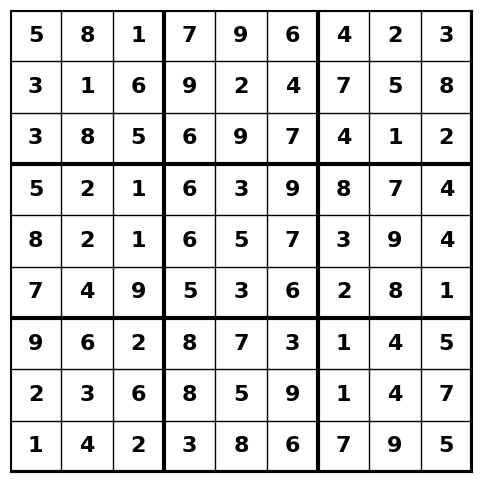

Parent 2:


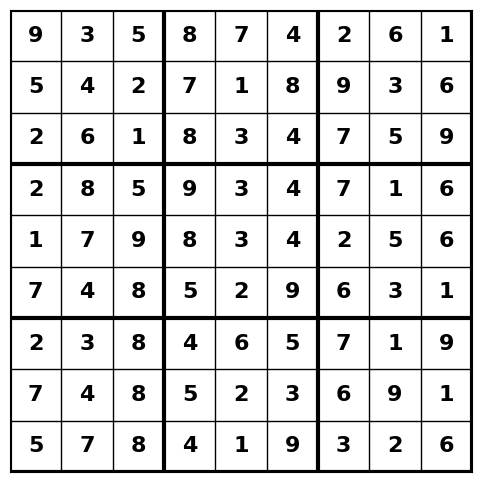

Offspring 1:


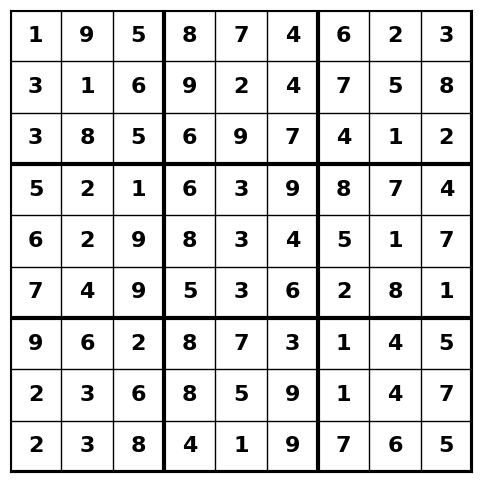

Offspring 2:


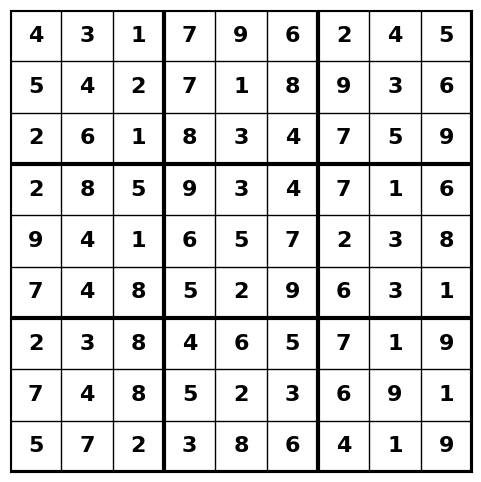

Offspring 1 Cost: 49
Offspring 2 Cost: 55


In [ ]:
def test_crossover():
    parent1 = generate_indiviual()
    parent2 = generate_indiviual()

    # Set specific crossover rows and points
    crossover_rows = [0, 4, 8]
    cx_point1, cx_point2 = 2, 5  # Crossover points in the middle

    # Create copies
    offspring1 = parent1.copy()
    offspring2 = parent2.copy()

    # Perform crossover on specific rows
    for row in crossover_rows:
        # Create mapping
        mapping = {}
        for i in range(cx_point1, cx_point2 + 1):
            mapping[parent1[row, i]] = parent2[row, i]
            mapping[parent2[row, i]] = parent1[row, i]

        # Apply segment from second parent to first offspring
        offspring1[row, cx_point1:cx_point2+1] = parent2[row, cx_point1:cx_point2+1]

        # Apply segment from first parent to second offspring
        offspring2[row, cx_point1:cx_point2+1] = parent1[row, cx_point1:cx_point2+1]

        # Fix the remaining elements
        for i in range(9):
            if i < cx_point1 or i > cx_point2:
                # Fix for offspring1
                current_value = offspring1[row, i]
                # Get all values in the crossover section
                crossover_values = set(offspring1[row, cx_point1:cx_point2+1])

                attempts = 0
                max_attempts = 100  # Arbitrary limit to prevent infinite loops

                while current_value in crossover_values and attempts < max_attempts:
                    current_value = mapping.get(current_value, current_value)
                    attempts += 1

                    # If we're stuck in a loop, pick a random valid value
                    if attempts >= max_attempts:
                        # Find values not in this row
                        used_values = set(offspring1[row, :])
                        available_values = set(range(1, 10)) - used_values

                        # If there are available values, pick one
                        if available_values:
                            current_value = min(available_values)  # Just pick the smallest for determinism
                        # If no valid values (shouldn't happen in a valid Sudoku), keep original

                offspring1[row, i] = current_value

                # Fix for offspring2 (similar logic)
                current_value = offspring2[row, i]
                crossover_values = set(offspring2[row, cx_point1:cx_point2+1])

                attempts = 0
                while current_value in crossover_values and attempts < max_attempts:
                    current_value = mapping.get(current_value, current_value)
                    attempts += 1

                    if attempts >= max_attempts:
                        used_values = set(offspring2[row, :])
                        available_values = set(range(1, 10)) - used_values

                        if available_values:
                            current_value = min(available_values)

                offspring2[row, i] = current_value

    # Visualize and check results
    print("Parent 1:")
    visualize_sudoku(parent1)

    print("Parent 2:")
    visualize_sudoku(parent2)

    print("Offspring 1:")
    visualize_sudoku(offspring1)

    print("Offspring 2:")
    visualize_sudoku(offspring2)

    # Check costs
    cost_o1, _, _ = check_cost(offspring1)
    cost_o2, _, _ = check_cost(offspring2)
    print(f"Offspring 1 Cost: {cost_o1}")
    print(f"Offspring 2 Cost: {cost_o2}")

# Run the specific test
test_crossover()

In [ ]:
def mutate(sudoku, mutation_rate=0.1):

    mutated = sudoku.copy()

    for row in range(9):
        # Apply mutation with probability mutation_rate
        if random.random() < mutation_rate:
            # Choose two random positions in the row
            i, j = random.sample(range(9), 2)

            # Swap the values
            mutated[row, i], mutated[row, j] = mutated[row, j], mutated[row, i]

    return mutated

Generation 2: Best Cost = 37
Generation 3: Best Cost = 35
Generation 4: Best Cost = 34
Generation 10: Best Cost = 33
Generation 16: Best Cost = 31
Generation 34: Best Cost = 30
Generation 38: Best Cost = 29
Generation 40: Best Cost = 28
Generation 50: Best Cost = 27
Generation 53: Best Cost = 26
Generation 59: Best Cost = 25
Generation 64: Best Cost = 23
Generation 68: Best Cost = 21
Generation 75: Best Cost = 20
Generation 77: Best Cost = 18
Generation 84: Best Cost = 16
Generation 86: Best Cost = 15
Generation 91: Best Cost = 13
Generation 92: Best Cost = 12
Generation 93: Best Cost = 10
Generation 104: Best Cost = 9
Generation 108: Best Cost = 8
Generation 112: Best Cost = 7
Generation 116: Best Cost = 6
Generation 122: Best Cost = 5
Generation 130: Best Cost = 4
Generation 366: Best Cost = 2
Best Solution Cost: 2


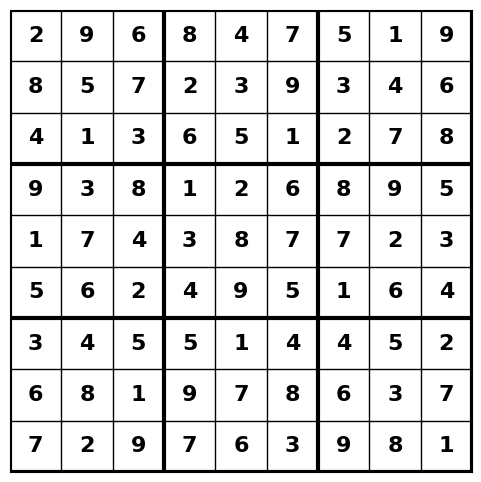

In [12]:
import numpy as np
import random
from copy import deepcopy

# Problem Definition
class SudokuProblem:
    def __init__(self):
        self.grid_size = 9
        self.subgrid_size = 3
        self.min_value = 1
        self.max_value = 9
        self.cost_function = self.sudoku_cost
        self.acceptable_cost = 0

    def sudoku_cost(self, sudoku):
        conflicts = 0
        for col in range(9):
            conflicts += 9 - len(np.unique(sudoku[:, col]))
        for i in range(0, 9, 3):
            for j in range(0, 9, 3):
                subgrid = sudoku[i:i+3, j:j+3].flatten()
                conflicts += 9 - len(np.unique(subgrid))
        return conflicts

# Individual Representation
def generate_individual():
    sudoku = np.zeros((9, 9), dtype=int)
    for i in range(9):
        numbers = list(range(1, 10))
        random.shuffle(numbers)
        sudoku[i] = numbers
    return sudoku

class SudokuIndividual:
    def __init__(self, prob):
        self.chromosome = generate_individual()
        self.cost = prob.cost_function(self.chromosome)

    def mutate(self, mutation_rate=0.1):
        for row in range(9):
            if random.random() < mutation_rate:
                i, j = random.sample(range(9), 2)
                self.chromosome[row, i], self.chromosome[row, j] = self.chromosome[row, j], self.chromosome[row, i]
        self.cost = prob.cost_function(self.chromosome)

    def crossover(self, parent2, prob):
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        for row in range(9):
            if random.random() < 0.5:  # 50% chance to crossover each row
                p1_row = self.chromosome[row]
                p2_row = parent2.chromosome[row]
                point1, point2 = sorted(random.sample(range(9), 2))
                # Swap segment between points
                c1_row = p1_row.copy()
                c2_row = p2_row.copy()
                c1_row[point1:point2] = p2_row[point1:point2]
                c2_row[point1:point2] = p1_row[point1:point2]
                # Fix duplicates outside segment (simplified)
                child1.chromosome[row] = c1_row
                child2.chromosome[row] = c2_row
        child1.cost = prob.cost_function(child1.chromosome)
        child2.cost = prob.cost_function(child2.chromosome)
        return child1, child2

# Parameters
class Parameters:
    def __init__(self):
        self.population = 1000
        self.birth_rate_per_generation = 1
        self.gene_mutation_rate = 0.1
        self.max_number_of_generations = 1000

# Main GA Loop
def run_genetic(prob, params):
    population = [SudokuIndividual(prob) for _ in range(params.population)]
    best_solution = min(population, key=lambda x: x.cost)

    for i in range(params.max_number_of_generations):
        children = []
        while len(children) < params.population * params.birth_rate_per_generation:
            parent1_idx, parent2_idx = random.sample(range(params.population), 2)
            parent1, parent2 = population[parent1_idx], population[parent2_idx]
            child1, child2 = parent1.crossover(parent2, prob)
            child1.mutate(params.gene_mutation_rate)
            child2.mutate(params.gene_mutation_rate)
            children.extend([child1, child2])

        population = sorted(population + children, key=lambda x: x.cost)[:params.population]
        current_best = population[0]
        if current_best.cost < best_solution.cost:
            best_solution = deepcopy(current_best)
            print(f"Generation {i}: Best Cost = {best_solution.cost}")

        if best_solution.cost <= prob.acceptable_cost:
            break

    return population, best_solution

# Run
prob = SudokuProblem()
params = Parameters()
pop, best = run_genetic(prob, params)
print("Best Solution Cost:", best.cost)
visualize_sudoku(best.chromosome)